In [3]:
%matplotlib notebook
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import numpy as np

# Tensores

Podemos definir los tensores como una progresión matemática de las cantidades escalares y vectoriales. En esta sección vamos a dar definiciones prácticas para ser implementadas numéricamente. 

1. Escalares: Representadas por un número único, son independientes del sistema de coordenadas.
2. Vectores: Representados por una tupla de valores de dependientes del sistema de coordenadas.
3. Tensores de segundo orden: Pueden ser representados por medio de matrices, los cuales en general, son independientes del sistema de coordenadas.

Un tensor puede relacionar dos vectores:

$$\mathbf{ u = Tv }$$

Usando la notación de indices:

$$ u_{i} = T_{ij}v_{j} $$


In [3]:
T=np.ones((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        if(i != j):
            T[i,j] = i+1
        else:
            T[i,j] = j+2
print(T)

[[2. 1. 1.]
 [2. 3. 2.]
 [3. 3. 4.]]


In [4]:
# Creamos dos vectores
u = np.zeros(3)
v = np.array([1.,2.,2.])

In [5]:
# Transformamos el vector v en u

for i in range(3):
    u[i] = 0.
    for j in range(3):
        u[i] = u[i]+T[i,j]*v[j]
        
print('v', v)
print('u', u)

('v', array([1., 2., 2.]))
('u', array([ 6., 12., 17.]))


Los tensores pueden ser construidos a partir del producto de Kronecker de dos vectores

$$\mathbf{T = u \otimes v}$$ 

Usando notación de indices

$$ T_{ij} = u_{i}v_{j}  $$ 


In [22]:
S = np.ones((2,2))

sz1 = np.array([1,0])
sz2 = np.array([0,1])

for i in range(len(S)):
    for j in range(len(S)):
        S[i,j] = sz1[i]*sz2[j]
        
        
print(S)

[[0. 1.]
 [0. 0.]]


In [5]:
u = np.array([2,3,6])
v = np.array([1,4,2])

T = np.ones((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        T[i,j] = u[i]*v[j]

print(T)

[[ 2.  8.  4.]
 [ 3. 12.  6.]
 [ 6. 24. 12.]]


Si $b$ representa una matriz de cambio de coordenadas, las nuevas componentes del tensor se obtienen a través del tensor original. Esto es lo que realmente define a los tensores: Sus propiedades de transformación!

$$ \mathbf{ T' = b T b^{T} }  $$

En notación de subindices

$$  T_{ij}' = b_{ik}b_{jl}T_{kl}  $$

Tambien podemos encontrar el tensor original usando el tensor nuevo:

$$ \mathbf{ T = b^{T} T'b }  $$



1. Definamos una matriz que representa una rotación alrededor del eje Z.

In [6]:
theta = np.pi/4.0

b = np.array( [[np.cos(theta), -np.sin(theta), 0], [ np.sin(theta), np.cos(theta), 0], [0.,0.,1.]]) 
print(b)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [7]:
# Encontrar las componentes usando indices

Tprime = np.zeros((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        for k in range(len(T)):
            for l in range(len(T)):
                Tprime[i,j] = Tprime[i,j] + b[i,k]*b[j,l]*T[k,l]

print(Tprime)

[[  1.5         -2.5         -1.41421356]
 [ -7.5         12.5          7.07106781]
 [-12.72792206  21.21320344  12.        ]]


In [8]:
# Encontrar usando las formas matriciales

Tmp = np.dot( b, T )
Tprime2 = np.dot(Tmp, b.T)
print(Tprime2)

[[  1.5         -2.5         -1.41421356]
 [ -7.5         12.5          7.07106781]
 [-12.72792206  21.21320344  12.        ]]


### Tambien podemos transformar primero los vectores y posterioremente hacer el producto de kronecker

In [9]:
uprime = np.zeros(3)
vprime = np.zeros(3)

for i in range(len(uprime)):
    for j in range(len(uprime)):
        uprime[i] = uprime[i] + b[i,j]*u[j]
        vprime[i] = vprime[i] + b[i,j]*v[j]
    
print(uprime)
print(vprime)

[-0.70710678  3.53553391  6.        ]
[-2.12132034  3.53553391  2.        ]


In [10]:
Tprime3 = np.ones((3,3))

for i in range(len(uprime)):
    for j in range(len(uprime)):
        Tprime3[i,j] = uprime[i]*vprime[j]

print(Tprime3)

[[  1.5         -2.5         -1.41421356]
 [ -7.5         12.5          7.07106781]
 [-12.72792206  21.21320344  12.        ]]


# Ejes principales de un tensor.

Los tensores pueden ser simétricos ($T_{ij}, T_{ji}$). Siempre es posible encontrar un sistema de coordenadas donde el tensor tome un forma diagonal. Podemos encontrar los ejes principales encontrando los valores y vectores propios.

In [11]:
T=np.ones((3,3))
T[0,0]=-4.0
T[1,1]=3.0
T[2,2]=2.0
T[0,1]=3.0;  T[1,0]=T[0,1]
T[0,2]=-1.0; T[2,0]=T[0,2]
T[1,2]=-3.0; T[2,1]=T[1,2]
print(T)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


In [12]:
valores, vectores = np.linalg.eig(T)
print(valores)
print(vectores)
#print(vectores.T)

[ 6.38719536 -5.11153053 -0.27566482]
[[-0.27656948 -0.93570162  0.21902465]
 [-0.76272731  0.35237891  0.54228789]
 [ 0.58459932  0.0170758   0.81114244]]


  $\mathbf {T = ADA^{T}}$

In [13]:
D = np.zeros((3,3))
for i in range(len(D)):
    for j in range(len(D)):
        if(i == j):
            D[i,j] = valores[i]

print(D)

[[ 6.38719536  0.          0.        ]
 [ 0.         -5.11153053  0.        ]
 [ 0.          0.         -0.27566482]]


In [14]:
Ttmp = np.dot( vectores, D ) 
Tprime = np.dot( Ttmp, vectores.T)
print(Tprime)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


# El tensor de inercia: Crear Datos

In [13]:
def CreateData(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
      
        a = 1.0
        b = 1.5
        c = 3.0
      
        ra = a * u**(1./3.)
        rb = b * u**(1./3.)
        rc = c * u**(1./3.)
        
        X = np.append(X, ra*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, rb*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, rc*np.cos(theta))
    
    return X, Y, Z

In [14]:
data_sphere = CreateData(5000, 1)
data_sphere = np.array(data_sphere)

<IPython.core.display.Javascript object>


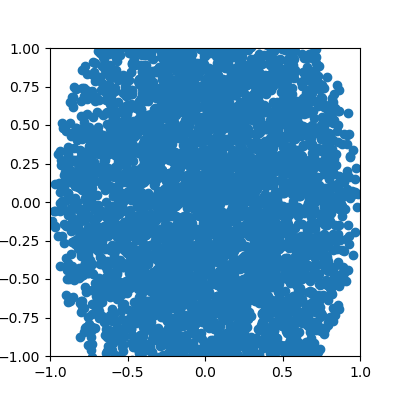

In [15]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)
plt.scatter(data_sphere[0], data_sphere[1])

<IPython.core.display.Javascript object>


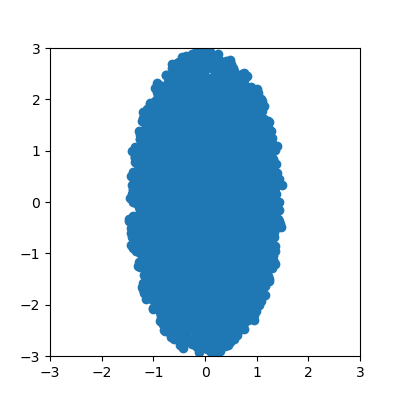

In [16]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(data_sphere[1], data_sphere[2])

In [17]:
# hacemos rotación alrededor de
theta = np.pi/8.0

rota = np.array([[1.,0.,0.],[0., np.cos(theta), -np.sin(theta)], [ 0., np.sin(theta), np.cos(theta)]]) 
print(rota)

[[ 1.          0.          0.        ]
 [ 0.          0.92387953 -0.38268343]
 [ 0.          0.38268343  0.92387953]]


In [19]:
new_data = np.dot(rota.T,data_sphere) # Transforma los datos
#new_data = data_sphere # Transforma los datos

# Guardamos los datos
np.savetxt('data/CuerposCelestes.dat', new_data.T)

<IPython.core.display.Javascript object>


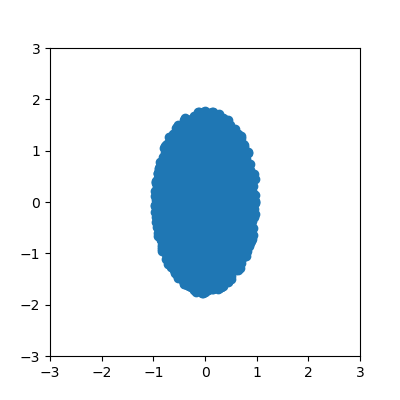

In [21]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(new_data[0], new_data[1])

<IPython.core.display.Javascript object>


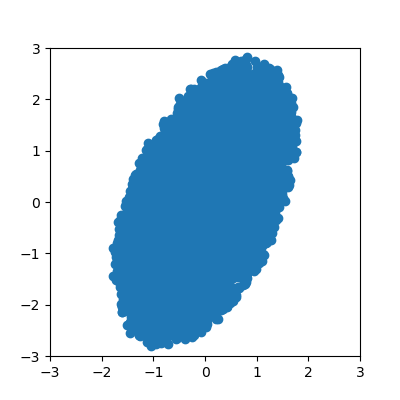

In [22]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(new_data[1], new_data[2])

# El tensor de inercia

Para un sistema de $N$ partículas con masa $m_{k}$ y posiciones $r_{k}$, el tensor de inercia se define como:

$$ \mathbf{I} = \sum_{k=1}^{N} m_{k}( (r_{k}\cdot r_{k})\mathbf{E}  - r_{k}\otimes r_{k})  $$

donde $ \mathbf{E}$ es el tensor unitario $e_{1}\otimes e_{1}+e_{2}\otimes e_{2}+e_{3}\otimes e_{3}  $

# Calculando el tensor de inercia

In [23]:
ITensor = np.zeros((3,3))
PTensor = np.zeros((3,3))
UnitTensors = np.array([[1,0,0],[0,1,0],[0,0,1]])

Npoints = len(new_data[:,0])
print(Npoints)

3


In [24]:
for k in range(Npoints):
    Dotproducts = sum( new_data[k,:] * new_data[k,:] )
    
    for i in range(3):
        for j in range(3):
            PTensor[i,j] = new_data[k,i] * new_data[k,j]
    
    ITensor = ITensor + UnitTensors*Dotproducts - PTensor

In [25]:
print(ITensor)

[[ 1.25283001e+04  3.64511886e-01 -1.28149723e-01]
 [ 3.64511886e-01  1.25218999e+04  1.48958366e+00]
 [-1.28149723e-01  1.48958366e+00  1.25273206e+04]]


In [26]:
eigenvalues, eigenvectors = np.linalg.eig(ITensor)
print(eigenvalues)
print(eigenvectors)

[12521.49578686 12528.32366455 12527.7011652 ]
[[-0.05648241  0.99695841  0.05369969]
 [ 0.9669765   0.04123671  0.25150741]
 [-0.24852803 -0.06613209  0.96636451]]


In [27]:
print(eigenvectors[0,0],eigenvectors[0,1],eigenvectors[0,2])

(-0.05648240570344024, 0.9969584146864386, 0.05369969489578403)


In [28]:
DataEnlosEjes = np.dot(eigenvectors.T, new_data)

<IPython.core.display.Javascript object>


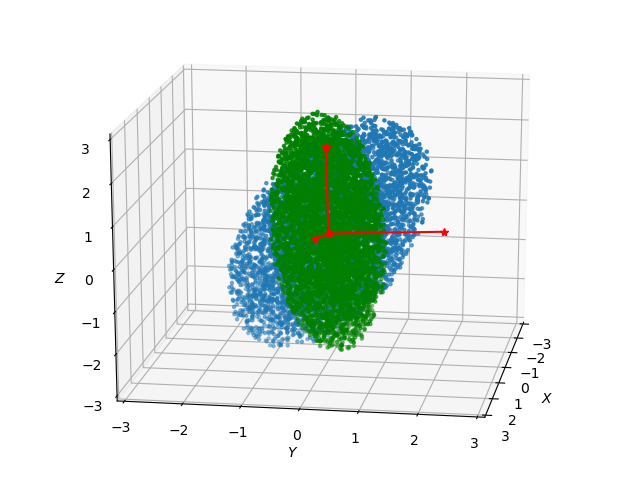

In [29]:
fig = plt.figure()
ax = Axes3D(fig, elev = 18, azim = 9)

X, Y, Z = new_data[0], new_data[1], new_data[2]
X1, Y1, Z1 = DataEnlosEjes[0], DataEnlosEjes[1], DataEnlosEjes[2]

for i in range(len(eigenvectors)):
    
    xs = np.array([0,2*eigenvectors[i,0]])
    ys = np.array([0,2*eigenvectors[i,1]])
    zs = np.array([0,2*eigenvectors[i,2]])
    ax.plot(xs,ys,zs, marker='*', color='r' )

ax.scatter(X, Y, Z, marker='.')
ax.scatter(X1, Y1, Z1, marker='.', color='g')


ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')

plt.savefig('SistemaDeAsteroides.pdf')